# Japan Earthquake

In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
jpn = pd.read_csv('japan_earth.csv')

#### The Data

In [3]:
jpn.head()

,Unnamed: 0,Date,Region,Depth,Magnitude,Deaths,Total damage
0,0,01/01/2024,Honshu (Ishikawa),10 km,7.5,240,NaN
1,1,10/08/2023,Izu Islands,10 km,4.9,0,NaN
2,2,10/05/2023,Izu Islands,10 km,6.1,0,NaN
3,3,05/05/2023,"Honshu (Ishikawa, Toyama)",8 km,6.2,1,NaN
4,4,03/16/2022,Off Fukushima,63 km,7.3,4,NaN


In [4]:
jpn.dtypes

Unnamed: 0        int64
Date             object
Region           object
Depth            object
Magnitude       float64
Deaths            int64
Total damage    float64
dtype: object

In [5]:
Jpn = jpn.copy()

In [6]:
Jpn['Date'] = pd.to_datetime(jpn['Date'])

In [7]:
Jpn['Total damage']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
166   NaN
167   NaN
168   NaN
169   NaN
170   NaN
Name: Total damage, Length: 171, dtype: float64

In [8]:
Jpn.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
Jpn

,Date,Region,Depth,Magnitude,Deaths,Total damage
0,2024-01-01,Honshu (Ishikawa),10 km,7.5,240,NaN
1,2023-10-08,Izu Islands,10 km,4.9,0,NaN
2,2023-10-05,Izu Islands,10 km,6.1,0,NaN
3,2023-05-05,"Honshu (Ishikawa, Toyama)",8 km,6.2,1,NaN
4,2022-03-16,Off Fukushima,63 km,7.3,4,NaN
...,...,...,...,...,...,...
166,1956-03-05,"Ne. Hokkaido Island, Japan",NaN,0.0,0,NaN
167,1954-11-18,Honshu (Miyagi Prefecture),55 km,6.5,0,NaN
168,1953-11-25,Kashima,NaN,7.4,1,NaN
169,1952-03-09,Hokkaido,NaN,7.1,0,NaN


In [10]:
Jpn['Magnitude'] = pd.to_numeric(Jpn['Magnitude'], errors='coerce')


In [11]:
Jpn['Depth (km)'] = Jpn['Depth'].str.replace(' km', ' ').astype(float)

In [12]:
Jpn.head()

,Date,Region,Depth,Magnitude,Deaths,Total damage,Depth (km)
0,2024-01-01,Honshu (Ishikawa),10 km,7.5,240,NaN,10.0
1,2023-10-08,Izu Islands,10 km,4.9,0,NaN,10.0
2,2023-10-05,Izu Islands,10 km,6.1,0,NaN,10.0
3,2023-05-05,"Honshu (Ishikawa, Toyama)",8 km,6.2,1,NaN,8.0
4,2022-03-16,Off Fukushima,63 km,7.3,4,NaN,63.0


In [13]:
Jpn.isna().sum()

Date              0
Region            0
Depth            22
Magnitude         0
Deaths            0
Total damage    171
Depth (km)       22
dtype: int64

In [14]:
Jpn.size

1197

In [15]:
Jpn.shape

(171, 7)

In [16]:
Jpn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          171 non-null    datetime64[ns]
 1   Region        171 non-null    object        
 2   Depth         149 non-null    object        
 3   Magnitude     171 non-null    float64       
 4   Deaths        171 non-null    int64         
 5   Total damage  0 non-null      float64       
 6   Depth (km)    149 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 9.5+ KB


In [17]:
Jpn.describe()

,Magnitude,Deaths,Total damage,Depth (km)
count,171.000000,171.000000,0.0,149.000000
mean,6.122222,45.695906,NaN,31.127517
std,1.909012,435.048126,NaN,17.266312
min,0.000000,0.000000,NaN,1.000000
25%,6.000000,0.000000,NaN,17.000000
50%,6.600000,0.000000,NaN,30.000000
75%,7.100000,1.000000,NaN,45.000000
max,9.100000,5502.000000,NaN,63.000000


In [18]:
Jpn.columns

Index(['Date', 'Region', 'Depth', 'Magnitude', 'Deaths', 'Total damage',
       'Depth (km)'],
      dtype='object')

In [19]:
Jpn = Jpn[['Date', 'Region', 'Magnitude', 'Deaths', 'Depth (km)']]

In [20]:
Jpn.fillna(Jpn.mean(), inplace=True)

C:\Users\ancep\AppData\Local\Temp\ipykernel_24992\2890564128.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Jpn.fillna(Jpn.mean(), inplace=True)
C:\Users\ancep\AppData\Local\Temp\ipykernel_24992\2890564128.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Jpn.fillna(Jpn.mean(), inplace=True)
C:\Users\ancep\AppData\Local\Temp\ipykernel_24992\2890564128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jpn.fillna(Jpn.mean(), inplace=True)


In [21]:
Jpn.head()

,Date,Region,Magnitude,Deaths,Depth (km)
0,2024-01-01,Honshu (Ishikawa),7.5,240,10.0
1,2023-10-08,Izu Islands,4.9,0,10.0
2,2023-10-05,Izu Islands,6.1,0,10.0
3,2023-05-05,"Honshu (Ishikawa, Toyama)",6.2,1,8.0
4,2022-03-16,Off Fukushima,7.3,4,63.0


In [22]:
Jpn.isna().sum()

Date          0
Region        0
Magnitude     0
Deaths        0
Depth (km)    0
dtype: int64

In [23]:
df = Jpn.copy()

In [24]:
df_corr = df.corr()

In [25]:
df_corr

,Magnitude,Deaths,Depth (km)
Magnitude,1.000000,0.067509,-0.009878
Deaths,0.067509,1.000000,0.082606
Depth (km),-0.009878,0.082606,1.000000


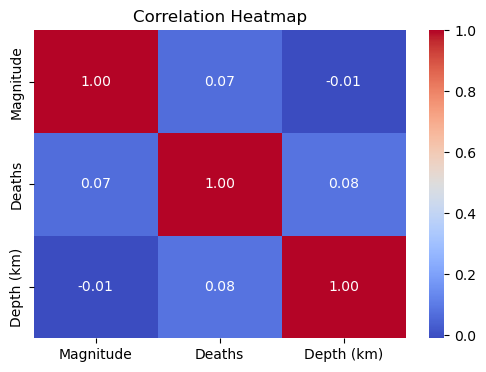

In [26]:
# Create a heatmap
plt.figure(figsize=(6,4))  # Adjust the size as needed
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [27]:
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

#### Visualization

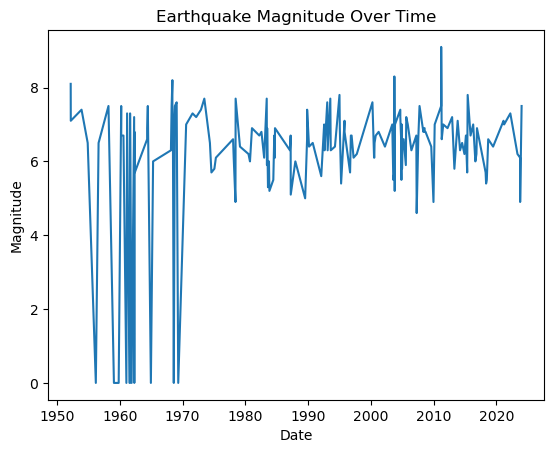

In [28]:
# Plotting time series of Magnitude
plt.plot(df['Magnitude'])
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.title('Earthquake Magnitude Over Time')
plt.show()

In [29]:
Jpn['Year'] = Jpn['Date'].dt.year
Jpn['Month'] = Jpn['Date'].dt.month

C:\Users\ancep\AppData\Local\Temp\ipykernel_24992\1619405114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jpn['Year'] = Jpn['Date'].dt.year


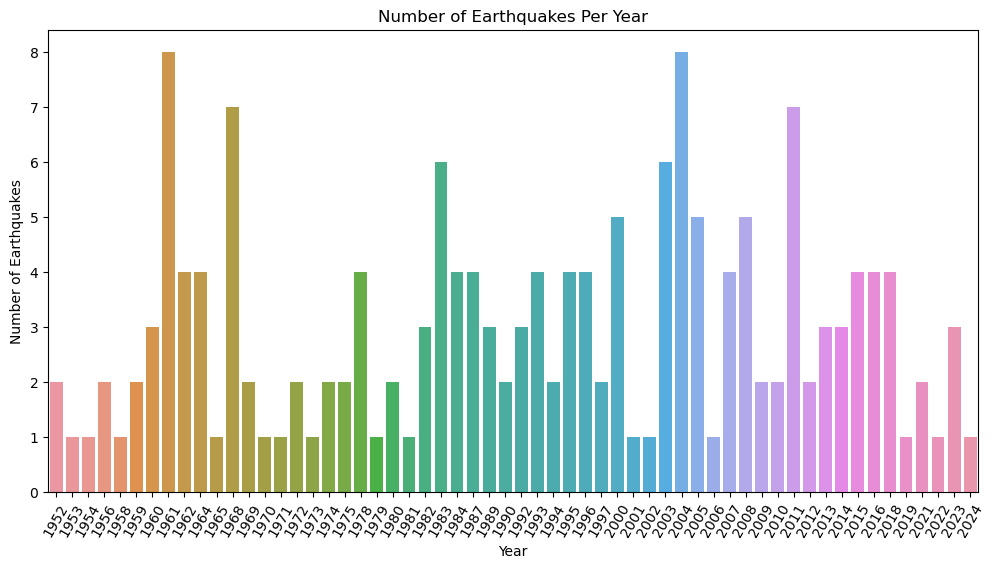

In [30]:
# Plot the number of earthquakes per year
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=Jpn)
plt.title('Number of Earthquakes Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.xticks(rotation=60)
plt.show()

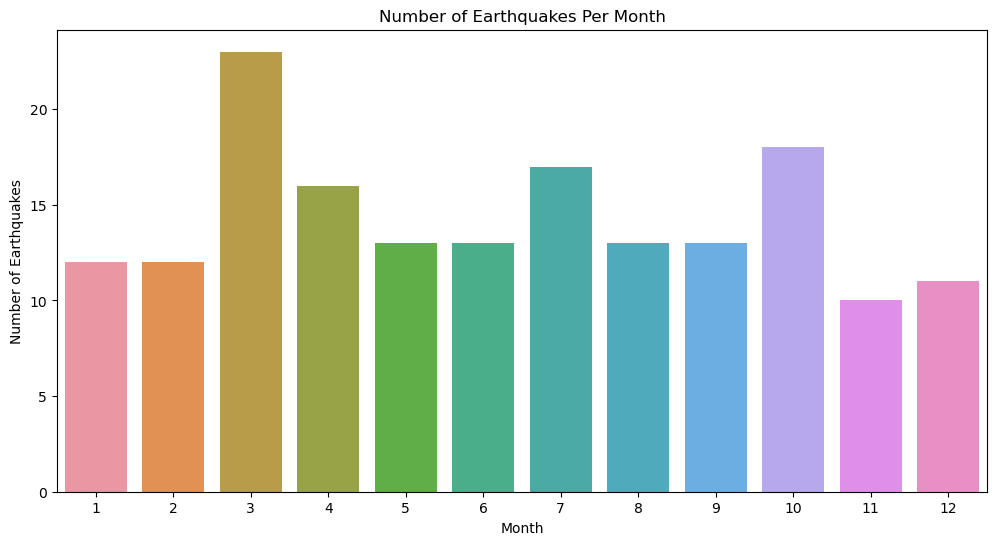

In [31]:

# Plot the number of earthquakes per month
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', data=Jpn)
plt.title('Number of Earthquakes Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Earthquakes')
plt.xticks(rotation=360)
plt.show()

In [32]:

top_regions_by_frequency = Jpn['Region'].value_counts().nlargest(10).index

In [33]:
top_regions_data = Jpn[Jpn['Region'].isin(top_regions_by_frequency)]

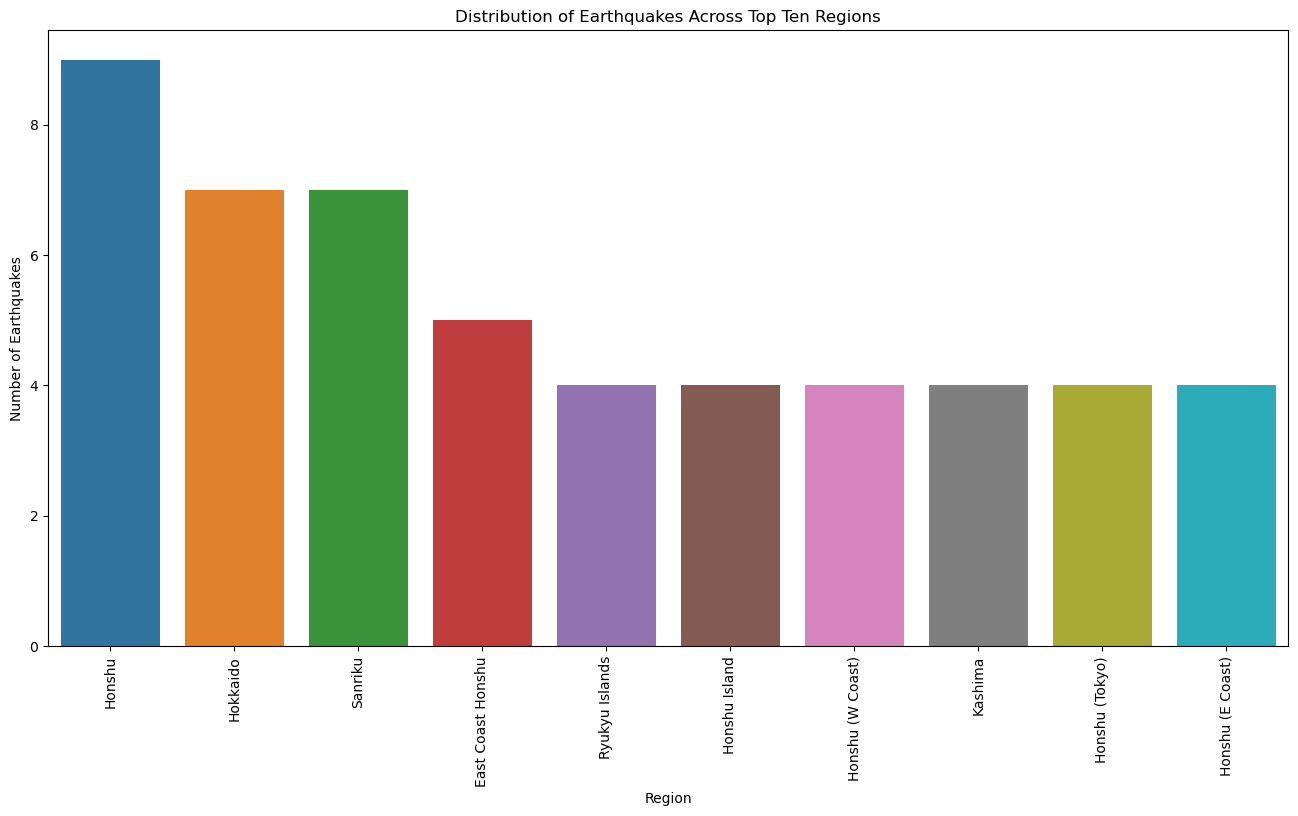

In [34]:
plt.figure(figsize=(16, 8))
sns.countplot(x='Region', data=top_regions_data, order=top_regions_by_frequency)
plt.title('Distribution of Earthquakes Across Top Ten Regions')
plt.xlabel('Region')
plt.ylabel('Number of Earthquakes')
plt.xticks(rotation=90)
plt.show()

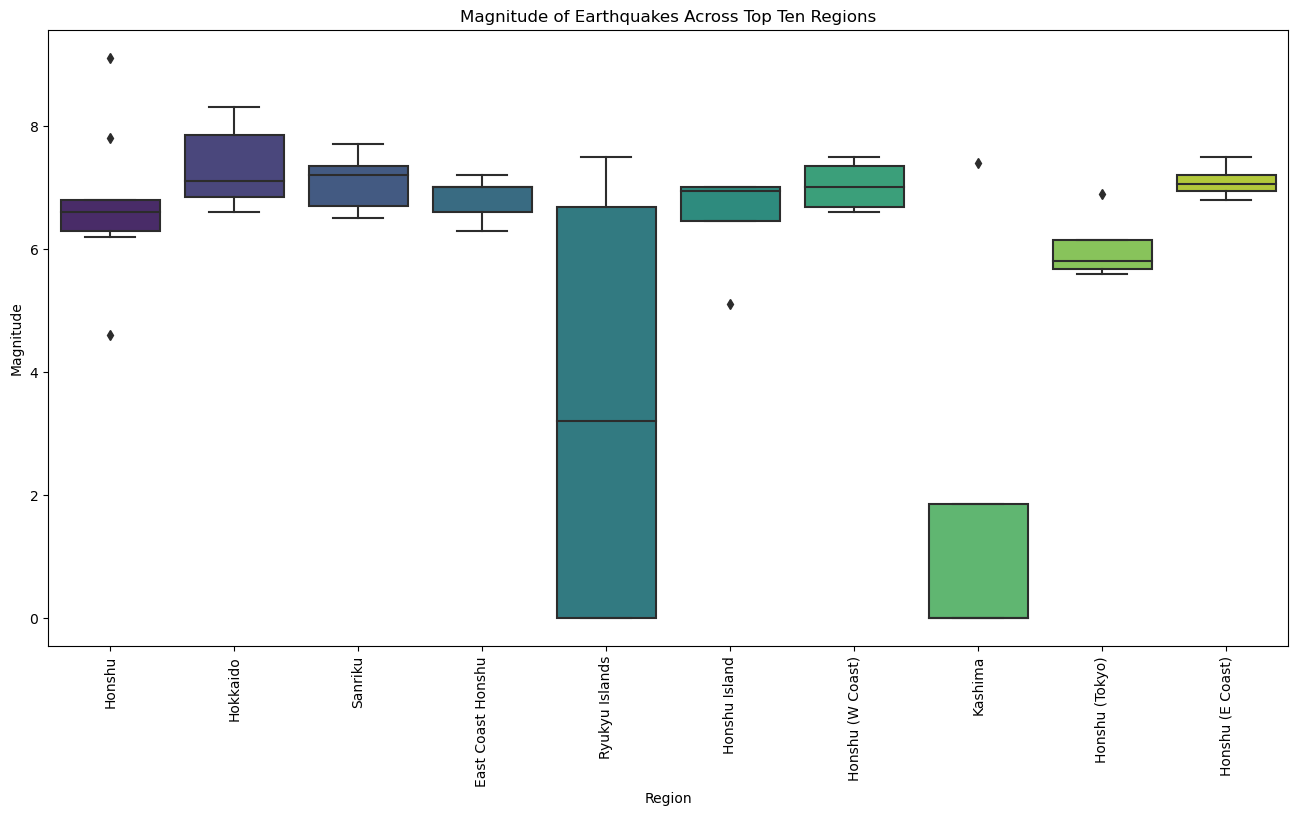

In [35]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='Region', y='Magnitude', data=top_regions_data, order=top_regions_by_frequency,
            palette='viridis')  
plt.title('Magnitude of Earthquakes Across Top Ten Regions')
plt.xlabel('Region')
plt.ylabel('Magnitude')
plt.xticks(rotation=90)
plt.show()

In [36]:
# Count the number of earthquakes in each region
region_counts = Jpn['Region'].value_counts()

In [37]:
top_ten = region_counts.head(10).index


In [38]:
jpn_mag = Jpn[Jpn['Region'].isin(top_ten)]

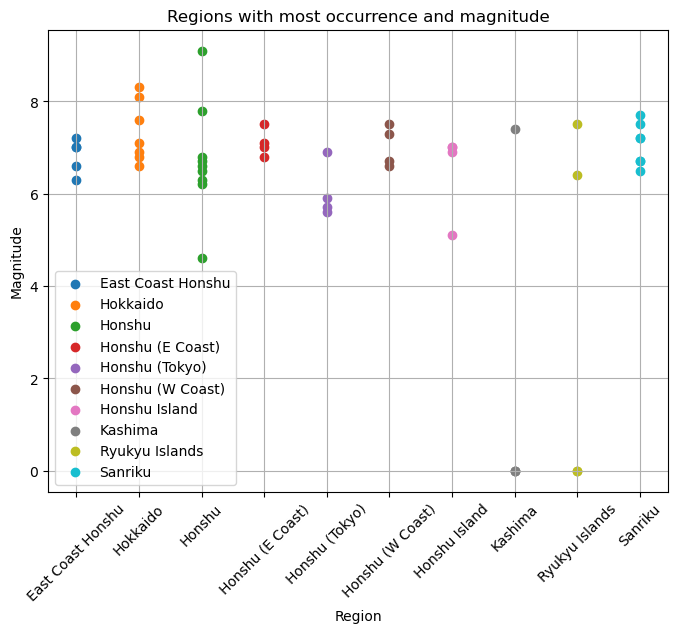

In [39]:
# Plot the magnitude for the top five regions
plt.figure(figsize=(8, 6))
for region, group in jpn_mag.groupby('Region'):
    plt.scatter([region] * len(group), group['Magnitude'], label=region)


plt.title('Regions with most occurrence and magnitude')
plt.xlabel('Region')
plt.ylabel('Magnitude')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [40]:
Jpn['Day'] = Jpn['Date'].dt.day

In [41]:
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

Jpn['Season'] = Jpn['Month'].apply(get_season)

In [42]:
Jpn['DayOfWeek'] = Jpn['Date'].dt.day_name()

In [43]:
Jpn['IsWeekend'] = Jpn['Date'].dt.dayofweek.isin([5, 6]).astype(int)


In [44]:
earthquakes_per_year = Jpn.groupby('Year')['Magnitude'].count()

In [45]:
earthquakes_per_year

Year
1952    2
1953    1
1954    1
1956    2
1958    1
1959    2
1960    3
1961    8
1962    4
1964    4
1965    1
1968    7
1969    2
1970    1
1971    1
1972    2
1973    1
1974    2
1975    2
1978    4
1979    1
1980    2
1981    1
1982    3
1983    6
1984    4
1987    4
1989    3
1990    2
1992    3
1993    4
1994    2
1995    4
1996    4
1997    2
2000    5
2001    1
2002    1
2003    6
2004    8
2005    5
2006    1
2007    4
2008    5
2009    2
2010    2
2011    7
2012    2
2013    3
2014    3
2015    4
2016    4
2018    4
2019    1
2021    2
2022    1
2023    3
2024    1
Name: Magnitude, dtype: int64

In [46]:
epicentre_mag = Jpn.groupby('Depth (km)')['Magnitude'].count()

In [47]:
epicentre_mag

Depth (km)
1.000000      2
2.000000      1
3.000000      2
4.000000      3
5.000000      2
6.000000      1
7.000000      4
8.000000      1
9.000000      2
10.000000     9
11.000000     3
12.000000     3
14.000000     3
17.000000     3
18.000000     1
19.000000     3
20.000000     4
22.000000     4
23.000000     2
24.000000     4
25.000000     2
26.000000     5
27.000000     3
28.000000     3
30.000000     5
31.127517    22
32.000000     1
33.000000     3
34.000000     2
35.000000     4
36.000000     3
37.000000     1
38.000000     2
39.000000     4
40.000000     4
41.000000     3
42.000000     3
43.000000     3
44.000000     2
45.000000     3
47.000000     2
48.000000     2
49.000000     2
50.000000     6
51.000000     1
52.000000     2
53.000000     2
55.000000     4
56.000000     3
57.000000     4
58.000000     4
59.000000     3
63.000000     1
Name: Magnitude, dtype: int64

In [48]:
Jpn.head()

,Date,Region,Magnitude,Deaths,Depth (km),Year,Month,Day,Season,DayOfWeek,IsWeekend
0,2024-01-01,Honshu (Ishikawa),7.5,240,10.0,2024,1,1,Winter,Monday,0
1,2023-10-08,Izu Islands,4.9,0,10.0,2023,10,8,Fall,Sunday,1
2,2023-10-05,Izu Islands,6.1,0,10.0,2023,10,5,Fall,Thursday,0
3,2023-05-05,"Honshu (Ishikawa, Toyama)",6.2,1,8.0,2023,5,5,Spring,Friday,0
4,2022-03-16,Off Fukushima,7.3,4,63.0,2022,3,16,Spring,Wednesday,0


In [49]:
Jpn['Region'].unique()

array(['Honshu (Ishikawa)', 'Izu Islands', 'Honshu (Ishikawa, Toyama)',
       'Off Fukushima', 'Honshu Island', 'Niigata Prefecture', 'Hokkaido',
       'Osaka', 'Honshu (S. Of)', 'Shimane Prefecture',
       'Near E Coast Honshu', 'Kurayoshi', 'Off East Coast Honshu',
       'Kumamoto, Oita', 'Kyusyu Island',
       'Bonin Islands [chichijima Island]', 'Honshu',
       'Nagano (Hakuba, Otari)', 'Sanriku', 'Southwestern',
       'Honshu (E Coast)', 'Miyakejima', 'Japan',
       'Honshu (Miyagi Prefecture)', 'Bonin Islands',
       'Tori Shima, Okinawa', 'Honshu (Ito)', 'Honshu (S Coast)',
       'Off East Coast Of Honshu Island', 'Honshu (Tokyo)',
       'Volcano Islands', 'Honshu (W Coast)', 'Kyushu',
       'East Coast Honshu', 'Kyushu (Fukuoka, Genkai)',
       'Hokkaido (Obiro, Haboro, Tomamae)', 'Hokkaido (Kushiro)',
       'Hokkaido (Bekkai, Kushiro, Nemouro)',
       'Honshu (Niigata Prefecture)',
       'Honshu (W Coast: Kyoto, Wakayama, Sakai)',
       'Honshu (W Coast: Kyoto

In [50]:
Jpn['mag_mean'] = Jpn['Magnitude'].mean()

In [51]:
Jpn['mag_anomaly'] = Jpn['Magnitude'] - Jpn['mag_mean']

In [52]:
Jpn.mag_anomaly

0      1.377778
1     -1.222222
2     -0.022222
3      0.077778
4      1.177778
         ...   
166   -6.122222
167    0.377778
168    1.277778
169    0.977778
170    1.977778
Name: mag_anomaly, Length: 171, dtype: float64

In [53]:
Jpn

,Date,Region,Magnitude,Deaths,Depth (km),Year,Month,Day,Season,DayOfWeek,IsWeekend,mag_mean,mag_anomaly
0,2024-01-01,Honshu (Ishikawa),7.5,240,10.000000,2024,1,1,Winter,Monday,0,6.122222,1.377778
1,2023-10-08,Izu Islands,4.9,0,10.000000,2023,10,8,Fall,Sunday,1,6.122222,-1.222222
2,2023-10-05,Izu Islands,6.1,0,10.000000,2023,10,5,Fall,Thursday,0,6.122222,-0.022222
3,2023-05-05,"Honshu (Ishikawa, Toyama)",6.2,1,8.000000,2023,5,5,Spring,Friday,0,6.122222,0.077778
4,2022-03-16,Off Fukushima,7.3,4,63.000000,2022,3,16,Spring,Wednesday,0,6.122222,1.177778
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,1956-03-05,"Ne. Hokkaido Island, Japan",0.0,0,31.127517,1956,3,5,Spring,Monday,0,6.122222,-6.122222
167,1954-11-18,Honshu (Miyagi Prefecture),6.5,0,55.000000,1954,11,18,Fall,Thursday,0,6.122222,0.377778
168,1953-11-25,Kashima,7.4,1,31.127517,1953,11,25,Fall,Wednesday,0,6.122222,1.277778
169,1952-03-09,Hokkaido,7.1,0,31.127517,1952,3,9,Spring,Sunday,1,6.122222,0.977778


In [54]:
depth_mean = Jpn['Depth (km)'].mean()

In [55]:
depth_anomaly = Jpn['Depth (km)'] - depth_mean

In [56]:
depth_anomaly

0     -2.112752e+01
1     -2.112752e+01
2     -2.112752e+01
3     -2.312752e+01
4      3.187248e+01
           ...     
166    1.421085e-14
167    2.387248e+01
168    1.421085e-14
169    1.421085e-14
170    9.872483e+00
Name: Depth (km), Length: 171, dtype: float64

In [57]:
anomaly_threshold = 2  

In [58]:
magnitude_anomalies = Jpn[abs(Jpn['mag_anomaly']) > anomaly_threshold]

In [59]:
magnitude_anomalies

,Date,Region,Magnitude,Deaths,Depth (km),Year,Month,Day,Season,DayOfWeek,IsWeekend,mag_mean,mag_anomaly
31,2011-03-11,Honshu,9.1,1475,24.000000,2011,3,11,Spring,Friday,0,6.122222,2.977778
64,2003-09-25,Hokkaido,8.3,0,6.000000,2003,9,25,Fall,Thursday,0,6.122222,2.177778
133,1969-04-21,Ryukyu Islands,0.0,0,31.127517,1969,4,21,Spring,Monday,0,6.122222,-6.122222
136,1968-08-05,Seikaido-Nankaido,0.0,0,31.127517,1968,8,5,Summer,Monday,0,6.122222,-6.122222
139,1968-05-16,Off East Coast Of Honshu Island,8.2,52,55.000000,1968,5,16,Spring,Thursday,0,6.122222,2.077778
143,1964-12-11,"Nw. Honshu Island, Japan",0.0,0,31.127517,1964,12,11,Winter,Friday,0,6.122222,-6.122222
149,1962-04-23,"Se. Hokkaido Island, Japan",0.0,0,31.127517,1962,4,23,Spring,Monday,0,6.122222,-6.122222
151,1961-11-15,Se. Hokkaido Island,0.0,0,31.127517,1961,11,15,Fall,Wednesday,0,6.122222,-6.122222
153,1961-08-11,Se. Hokkaido Island,0.0,0,31.127517,1961,8,11,Summer,Friday,0,6.122222,-6.122222
154,1961-07-18,Ryukyu Islands,0.0,0,31.127517,1961,7,18,Summer,Tuesday,0,6.122222,-6.122222


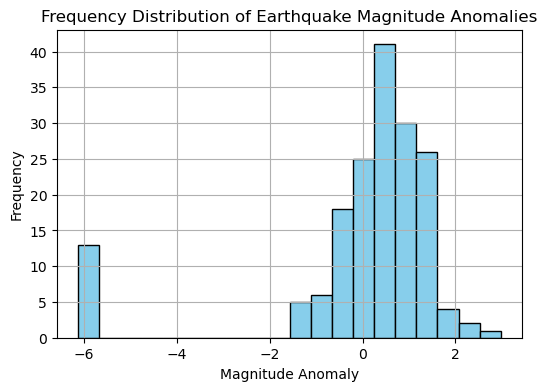

In [60]:
plt.figure(figsize=(6, 4))
plt.hist(Jpn['mag_anomaly'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Frequency Distribution of Earthquake Magnitude Anomalies')
plt.xlabel('Magnitude Anomaly')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [61]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [62]:
Jpn

,Date,Region,Magnitude,Deaths,Depth (km),Year,Month,Day,Season,DayOfWeek,IsWeekend,mag_mean,mag_anomaly
0,2024-01-01,Honshu (Ishikawa),7.5,240,10.000000,2024,1,1,Winter,Monday,0,6.122222,1.377778
1,2023-10-08,Izu Islands,4.9,0,10.000000,2023,10,8,Fall,Sunday,1,6.122222,-1.222222
2,2023-10-05,Izu Islands,6.1,0,10.000000,2023,10,5,Fall,Thursday,0,6.122222,-0.022222
3,2023-05-05,"Honshu (Ishikawa, Toyama)",6.2,1,8.000000,2023,5,5,Spring,Friday,0,6.122222,0.077778
4,2022-03-16,Off Fukushima,7.3,4,63.000000,2022,3,16,Spring,Wednesday,0,6.122222,1.177778
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,1956-03-05,"Ne. Hokkaido Island, Japan",0.0,0,31.127517,1956,3,5,Spring,Monday,0,6.122222,-6.122222
167,1954-11-18,Honshu (Miyagi Prefecture),6.5,0,55.000000,1954,11,18,Fall,Thursday,0,6.122222,0.377778
168,1953-11-25,Kashima,7.4,1,31.127517,1953,11,25,Fall,Wednesday,0,6.122222,1.277778
169,1952-03-09,Hokkaido,7.1,0,31.127517,1952,3,9,Spring,Sunday,1,6.122222,0.977778


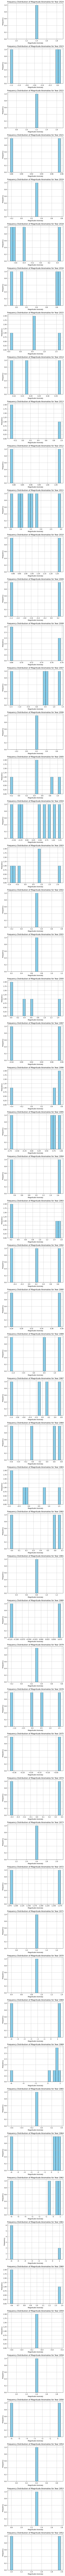

In [63]:
time_intervals = Jpn['Date'].dt.year.unique()  # Get unique years
num_intervals = len(time_intervals)

fig, axes = plt.subplots(num_intervals, 1, figsize=(6, 4*num_intervals))

for i, year in enumerate(time_intervals):
    ax = axes[i]
    data_year = Jpn[Jpn['Date'].dt.year == year]
    ax.hist(data_year['mag_anomaly'], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Frequency Distribution of Magnitude Anomalies for Year {year}')
    ax.set_xlabel('Magnitude Anomaly')
    ax.set_ylabel('Frequency')
    ax.grid(True)

plt.tight_layout()
plt.show()

#### Modelling

In [64]:
# Convert categorical variables to numerical
label_encoders = {}
for column in ['Season', 'DayOfWeek']:
    label_encoders[column] = LabelEncoder()
    Jpn[column] = label_encoders[column].fit_transform(Jpn[column])

In [65]:
X = Jpn.drop(['Date', 'Region', 'Year', 'Month', 'Day'], axis=1)
y_occurrence = X.pop('Magnitude')  # Target variable for earthquake occurrence
y_magnitude = Jpn['Magnitude']    # Target variable for earthquake magnitude

In [66]:
# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [67]:
# Split data into train and test sets
X_train, X_test, y_train_occurrence, y_test_occurrence, y_train_magnitude, y_test_magnitude = train_test_split(
    X_scaled, y_occurrence, y_magnitude, test_size=0.2, random_state=42)

In [68]:
linear_reg = LinearRegression()
dt_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()
knn_reg = KNeighborsRegressor()
svm_reg = SVR()

In [69]:
linear_reg.fit(X_train, y_train_magnitude)

LinearRegression()

In [70]:
dt_reg.fit(X_train, y_train_magnitude)

DecisionTreeRegressor()

In [71]:
rf_reg.fit(X_train, y_train_magnitude)

RandomForestRegressor()

In [72]:
knn_reg.fit(X_train, y_train_magnitude)

KNeighborsRegressor()

In [73]:
svm_reg.fit(X_train, y_train_magnitude)

SVR()

In [74]:
# Predictions
predictions_linear_reg = linear_reg.predict(X_test)
predictions_dt_reg = dt_reg.predict(X_test)
predictions_rf_reg = rf_reg.predict(X_test)
predictions_knn_reg = knn_reg.predict(X_test)
predictions_svm_reg = svm_reg.predict(X_test)

In [75]:
def evaluate_model(name, predictions, y_test):
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"{name}:")
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")
    print()

In [76]:
# Define a function to evaluate the model using different metrics
def evaluate_model(name, predictions, y_test):
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    print(f"{name}:")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R^2 Score: {r2}")
    print()

In [77]:
evaluate_model("Linear Regression", predictions_linear_reg, y_test_magnitude)

Linear Regression:
Mean Absolute Error: 1.7256037868459576e-15
Mean Squared Error: 4.643009899300813e-30
Root Mean Squared Error: 2.1547644649243714e-15
R^2 Score: 1.0



In [78]:
evaluate_model("Decision Tree Regression", predictions_dt_reg, y_test_magnitude)

Decision Tree Regression:
Mean Absolute Error: 0.03428571428571439
Mean Squared Error: 0.029142857142857137
Root Mean Squared Error: 0.1707127913861675
R^2 Score: 0.9903360457373028



In [79]:
evaluate_model("Random Forest Regression", predictions_rf_reg, y_test_magnitude)

Random Forest Regression:
Mean Absolute Error: 0.03845714285714365
Mean Squared Error: 0.030781085714285783
Root Mean Squared Error: 0.17544539239970305
R^2 Score: 0.9897927988652298



In [80]:
evaluate_model("KNN Regression", predictions_knn_reg, y_test_magnitude)

KNN Regression:
Mean Absolute Error: 0.3880000000000002
Mean Squared Error: 0.27626285714285714
Root Mean Squared Error: 0.5256071319368271
R^2 Score: 0.9083895033756165



In [81]:
evaluate_model("SVR", predictions_svm_reg, y_test_magnitude)

SVR:
Mean Absolute Error: 0.23367449254953085
Mean Squared Error: 0.36620635661659623
Root Mean Squared Error: 0.6051498629402441
R^2 Score: 0.8785636746697931



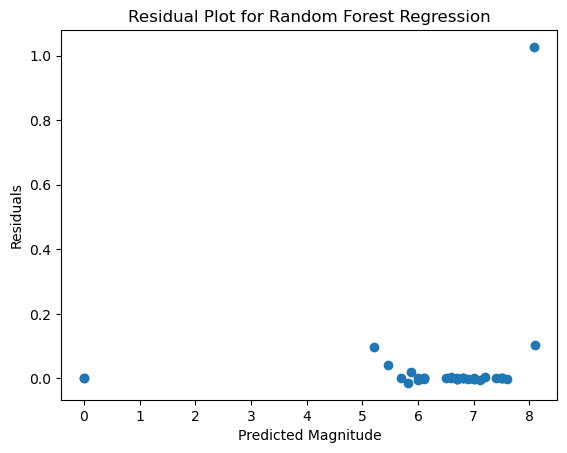

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Residual Analysis for Random Forest Regression (example)
residuals_rf = y_test_magnitude - predictions_rf_reg
plt.scatter(predictions_rf_reg, residuals_rf)
plt.xlabel("Predicted Magnitude")
plt.ylabel("Residuals")
plt.title("Residual Plot for Random Forest Regression")
plt.show()

### Plot actual vs predicted magnitudes

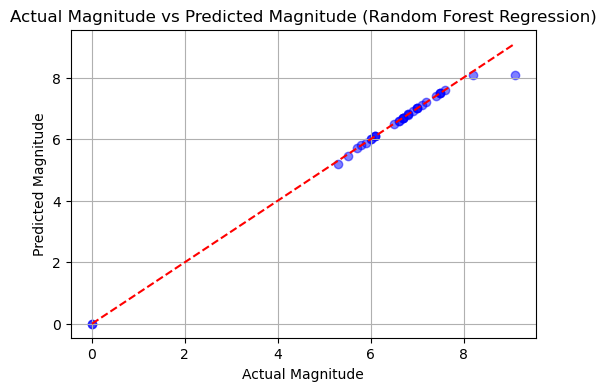

In [83]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test_magnitude, predictions_rf_reg, color='blue', alpha=0.5)
plt.plot([min(y_test_magnitude), max(y_test_magnitude)], [min(y_test_magnitude), max(y_test_magnitude)], color='red', linestyle='--')
plt.title('Actual Magnitude vs Predicted Magnitude (Random Forest Regression)')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.grid(True)
plt.show()